## Exploring IMD data

In [87]:
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cartopy.crs as ccrs
import cartopy as cp
import warnings
warnings.simplefilter('ignore')

#### Temperature

In [88]:
ds = xr.open_mfdataset('./tmax/netcdf/*.nc')

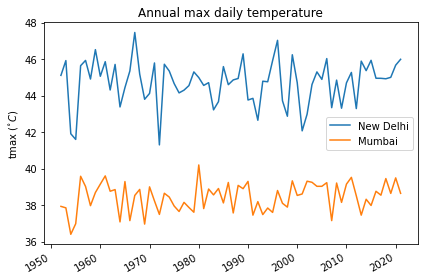

In [90]:
fig, ax = plt.subplots(1,1)

ds['tmax'].resample(time='1Y').max().sel(lat=28.700, lon=77.100, method='nearest').plot(ax=ax, label='New Delhi')
ds['tmax'].resample(time='1Y').max().sel(lat=19.076, lon=72.878, method='nearest').plot(ax=ax, label='Mumbai')

plt.title('Annual max daily temperature')
plt.ylabel('tmax ($^{\circ}C$)')
plt.xlabel(None)

plt.legend()
plt.tight_layout()
plt.savefig('./figures/tmax_ts.png', dpi=300)

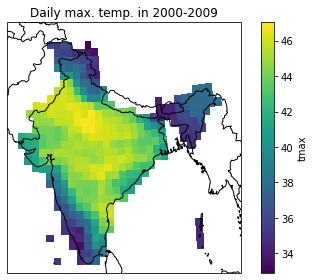

In [91]:
fig, ax = plt.subplots(1,1, subplot_kw={'projection':ccrs.Orthographic(central_longitude=73, central_latitude=21)})

ds['tmax'].sel(time=pd.date_range('2000-01-01', '2009-12-31')).max('time').plot(ax=ax, transform=ccrs.PlateCarree())

plt.title('Daily max. temp. in 2000-2009')

ax.coastlines()
ax.add_feature(cp.feature.BORDERS)
plt.tight_layout()

plt.savefig('./figures/tmax_map.png', dpi=300)

#### Rainfall

In [92]:
ds = xr.open_mfdataset('./rain/netcdf/*.nc')

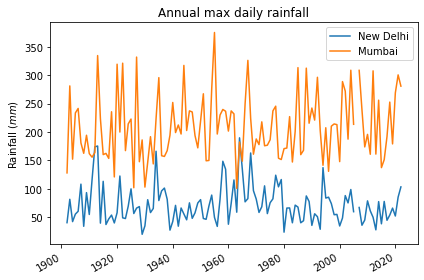

In [93]:
fig, ax = plt.subplots(1,1)

ds['rainfall'].resample(time='1Y').max().sel(lat=28.700, lon=77.100, method='nearest').plot(ax=ax, label='New Delhi')
ds['rainfall'].resample(time='1Y').max().sel(lat=19.076, lon=72.878, method='nearest').plot(ax=ax, label='Mumbai')

plt.title('Annual max daily rainfall')
plt.ylabel('Rainfall ($mm$)')
plt.xlabel(None)

plt.legend()
plt.tight_layout()
plt.savefig('./figures/rainfall_ts.png', dpi=300)

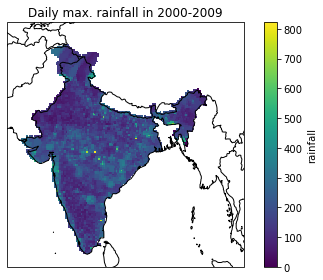

In [94]:
fig, ax = plt.subplots(1,1, subplot_kw={'projection':ccrs.Orthographic(central_longitude=73, central_latitude=21)})

ds['rainfall'].sel(time=pd.date_range('2000-01-01', '2009-12-31')).max('time').plot(ax=ax, transform=ccrs.PlateCarree())

plt.title('Daily max. rainfall in 2000-2009')

ax.coastlines()
ax.add_feature(cp.feature.BORDERS)
plt.tight_layout()

plt.savefig('./figures/rainfall_map.png', dpi=300)